### Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.10.0'

In [3]:
# This option ensures the charts I create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Path
path= r"C:\Users\nabar\OneDrive\Documents\A6 Project"
# Dataframe
df=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_dataset.csv'))

In [5]:
print(df.columns)

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')


In [6]:
# choose numerical columns
numeric_df = df.select_dtypes(include=["number"])

# Drop some of the columns from numeric_df
columns_to_remove = ["CASE_NO_PATIENT'S", "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8","A9","A10_Autism_Spectrum_Quotient",]
numeric_df_filtered = numeric_df.drop(columns=columns_to_remove)

correlation_matrix_filtered = numeric_df_filtered.corr()
correlation_matrix_filtered

,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Jaundice,Family_mem_with_ASD,ASD_traits
Social_Responsiveness_Scale,1.000000,-0.074058,0.380760,0.730897,0.717941,0.722557,0.733031,0.731653,0.736645,0.482705,0.731589,0.350285,0.134999,0.284151
Age_Years,-0.074058,1.000000,-0.186780,-0.165794,-0.172422,-0.146388,-0.165792,-0.167904,-0.166192,-0.103977,-0.164383,-0.073771,-0.045625,-0.020427
Qchat_10_Score,0.380760,-0.186780,1.000000,0.454559,0.449837,0.435124,0.456474,0.455770,0.445299,0.300508,0.454171,0.230571,0.133764,0.434376
Speech Delay/Language Disorder,0.730897,-0.165794,0.454559,1.000000,0.981929,0.956551,0.996970,0.994946,0.982963,0.647759,0.993950,0.514272,0.376251,0.320350
Learning disorder,0.717941,-0.172422,0.449837,0.981929,1.000000,0.939265,0.978953,0.976927,0.965200,0.636053,0.975988,0.517556,0.370439,0.313196
Genetic_Disorders,0.722557,-0.146388,0.435124,0.956551,0.939265,1.000000,0.959458,0.959458,0.944880,0.627544,0.956316,0.501364,0.365932,0.305193
Depression,0.733031,-0.165792,0.456474,0.996970,0.978953,0.959458,1.000000,0.997977,0.985951,0.649728,0.996971,0.512535,0.378304,0.319525
Global developmental delay/intellectual disability,0.731653,-0.167904,0.455770,0.994946,0.976927,0.959458,0.997977,1.000000,0.983930,0.648734,0.994948,0.512535,0.380451,0.321551
Social/Behavioural Issues,0.736645,-0.166192,0.445299,0.982963,0.965200,0.944880,0.985951,0.983930,1.000000,0.643087,0.982884,0.504502,0.368613,0.312343
Childhood Autism Rating Scale,0.482705,-0.103977,0.300508,0.647759,0.636053,0.627544,0.649728,0.648734,0.643087,1.000000,0.646731,0.333438,0.235731,0.202477


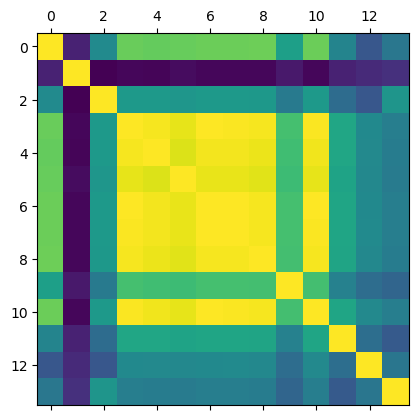

In [7]:
plt.matshow(numeric_df_filtered.corr())
plt.show()

<Figure size 900x900 with 0 Axes>

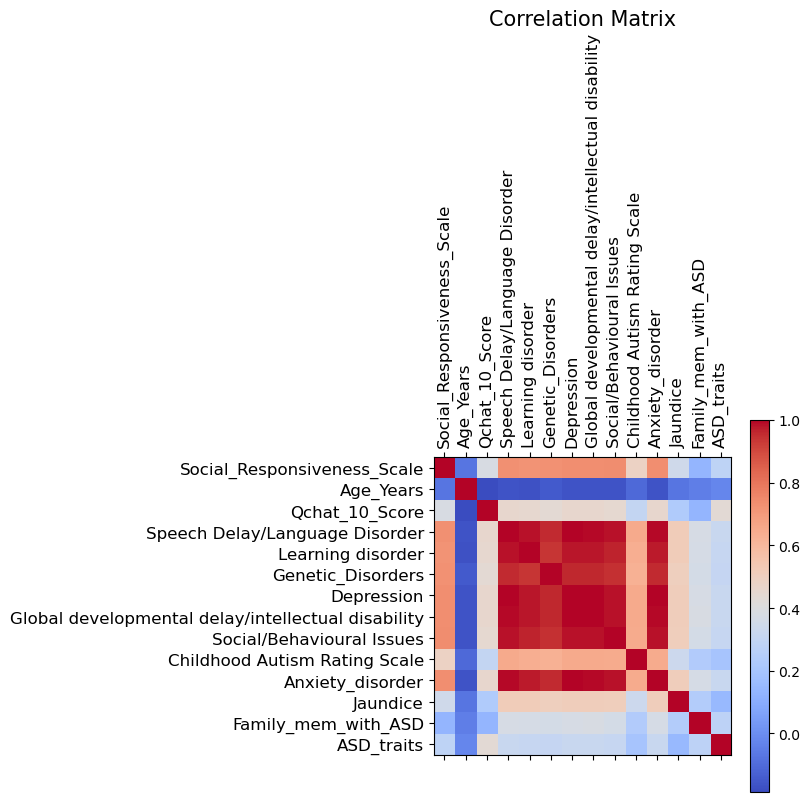

In [8]:
# Create figure with defined size
f = plt.figure(figsize=(9, 9))

# Generate correlation matrix heatmap without fignum parameter
plt.matshow(numeric_df_filtered.corr(), cmap="coolwarm")

# Set x-axis labels (rotate for readability)
plt.xticks(range(numeric_df_filtered.shape[1]), numeric_df_filtered.columns, fontsize=12, rotation=90)

# Set y-axis labels
plt.yticks(range(numeric_df_filtered.shape[1]), numeric_df_filtered.columns, fontsize=12)

# Add color legend
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)  # Set font size for color legend

# Add title
plt.title('Correlation Matrix', fontsize=15)

# Show the plot
plt.show()

### Observation
- Strong correlations (Red Shades) → Factors like the Social Responsiveness Scale, Qchat-10 Score, and Childhood Autism Rating Scale seem to have a high positive relationship with ASD Traits.
- Negative correlations (Blue Shades) → Age appears to show an inverse relationship with some ASD-related traits, meaning older individuals may score differently on screening tools.
- Moderate correlations → Some conditions, such as Speech Delay, Learning Disorders, and Anxiety, show significant but not extreme correlations with ASD.
What This Means:
- If variables have high positive correlation, they may be predictors or risk factors for ASD.
- If correlations are negative, those traits might become less pronounced with age or other influences.
- If correlations are near zero, there may be no direct relationship between those factors.


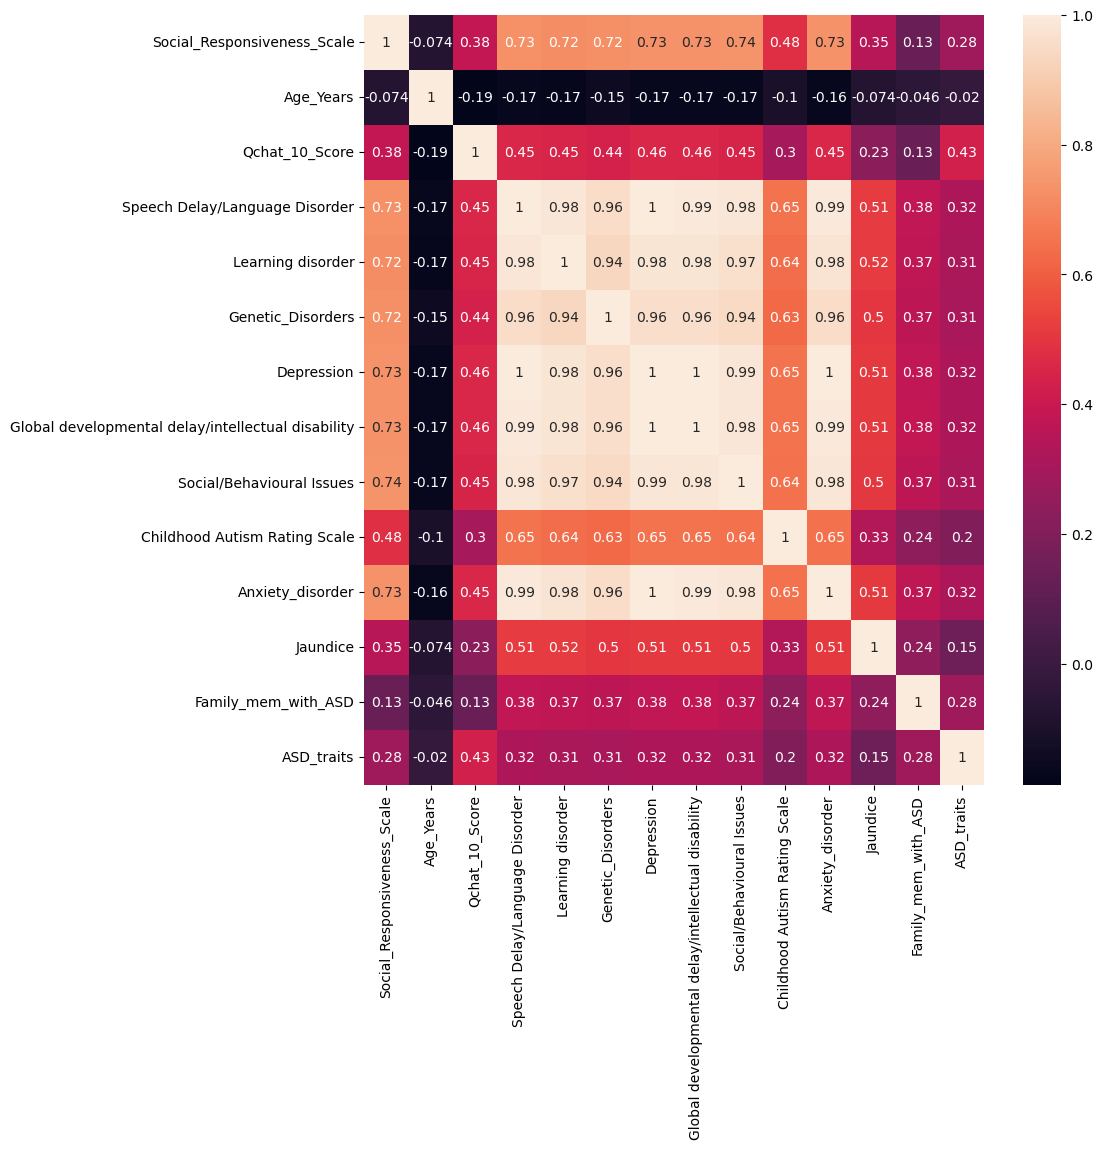

In [9]:
# Create a subplot with defined size
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(numeric_df_filtered.corr(), annot = True, ax = ax)
plt.show()

In [10]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'corr.png'), dpi=300, bbox_inches="tight")

### Obsevation
The correlation matrix heatmap provides a visual representation of how different medical and psychological conditions are related. The correlation coefficients in the plot range from -1 to 1, which indicate the strength and direction of the relationships between the variables.

#### Insights from Heatmap:
- High correlations may suggest predictive factors for ASD.
- Negative correlations could indicate variables that work inversely, helping in diagnosis strategies.
- Weak correlations mean those factors may not be strongly related and might need deeper investigation.



### Scatterplot 

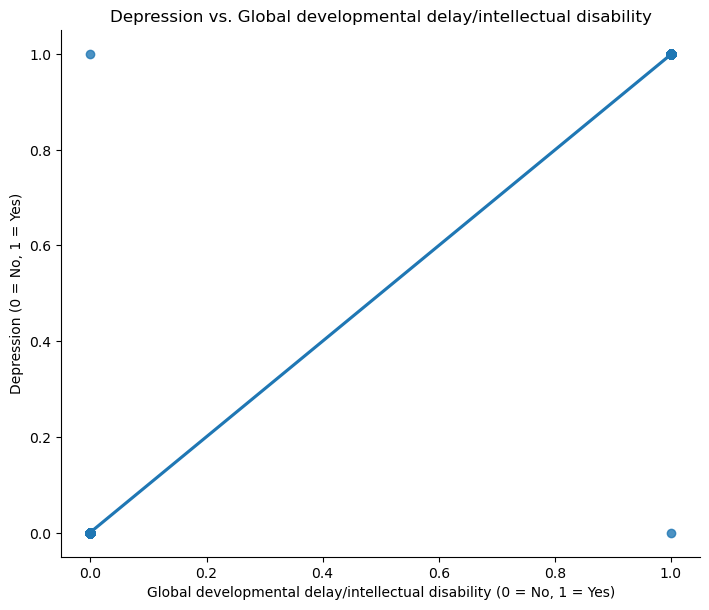

In [11]:
# Create scatterplot for Speech Delay vs. ASD Traits
scatt1= sns.lmplot(x='Global developmental delay/intellectual disability', y='Depression', data=df, height=6, aspect=1.2)

# Add title and labels
plt.title("Depression vs. Global developmental delay/intellectual disability")
plt.xlabel("Global developmental delay/intellectual disability (0 = No, 1 = Yes)")
plt.ylabel("Depression (0 = No, 1 = Yes)")

plt.show()

In [12]:
scatt1.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'scatt1.png'), dpi=300, bbox_inches="tight")

### Observations for Depression vs. Global Developmental Delay/Intellectual Disability
The scatter plot demonstrates a strong correlation between Depression and Global Developmental Delay/Intellectual Disability, based on the tight clustering of data points and the steep regression line. Here are the precise observations:

1️. Very Strong Positive Correlation → The data shows that individuals with Global Developmental Delay/Intellectual Disability have a significantly higher likelihood of experiencing depression. The regression line is steep, reinforcing this connection.

2️. Tightly Clustered Points → The scatterplot displays a strong linear pattern, with data points closely following the trendline. This suggests that depression is highly predictable in cases of developmental delay.

3️. No Confidence Interval (No Shading) → The lack of a shaded confidence band implies high certainty in the model's fit—meaning the dataset strongly supports this relationship with minimal variability.

4️. Minimal Outliers → There are very few scattered points that deviate from the correlation trend, indicating consistency in the data. The relationship between Depression and Global Developmental Delay/Intellectual Disability holds across most cases.


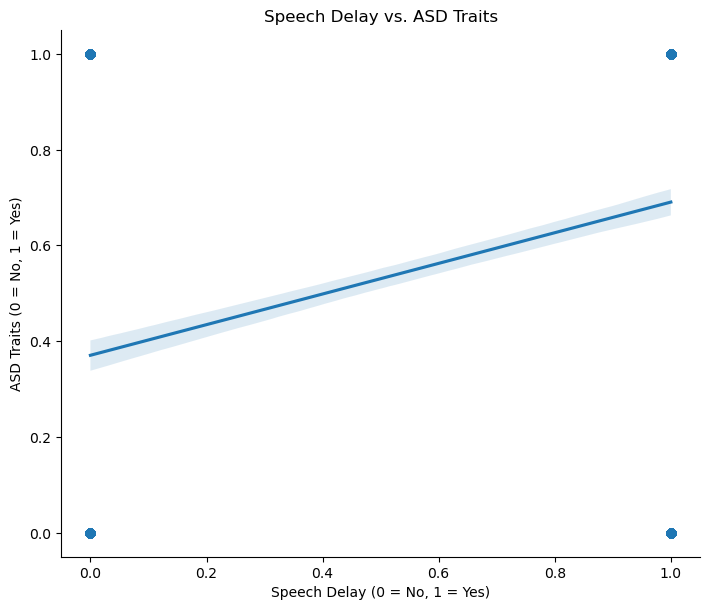

In [13]:
# Create scatterplot for Speech Delay vs. ASD Traits
scatt2=sns.lmplot(x='Speech Delay/Language Disorder', y='ASD_traits', data=df, height=6, aspect=1.2)

# Add title and labels
plt.title("Speech Delay vs. ASD Traits")
plt.xlabel("Speech Delay (0 = No, 1 = Yes)")
plt.ylabel("ASD Traits (0 = No, 1 = Yes)")

plt.show()


In [14]:
scatt2.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'scatt2.png'), dpi=300, bbox_inches="tight")

### Observations for ASD Traits and Speech Delay/Language Disorder
The scatterplot provides insights into how speech delay or language disorders relate to ASD traits. Here are the key takeaways:
* Positive Trend → The regression line suggests a higher likelihood of ASD traits in individuals with speech delay.
  
* Binary Data Effect → Since both variables are categorical (0 = No, 1 = Yes), the plot shows distinct groupings rather than a smooth spread.

  
* Variability in Speech & ASD Connection → While there is a clear trend, the scatter points indicate some variability, meaning speech delay alone does not fully determine ASD traits.

  
* Possible Clusters → If specific areas of the plot contain high densities of points, it may indicate subgroups, such as age groups or other influencing factors


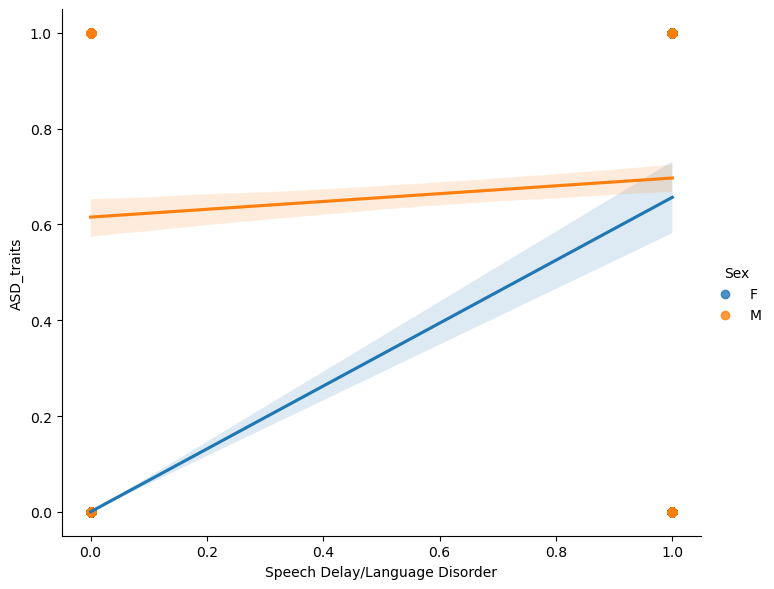

In [15]:
scatt3=sns.lmplot(x="Speech Delay/Language Disorder", y="ASD_traits", hue="Sex", data=df, height=6, aspect=1.2)
plt.show()

In [16]:
scatt3.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'scatt3.png'), dpi=300, bbox_inches="tight")

### Observations for Speech Delay/Language Disorder vs. ASD Traits (with Gender)
The scatterplot visually represents the relationship between Speech Delay/Language Disorder and ASD Traits, while also factoring in gender differences. Here are the precise observations:

1) Positive Correlation Between Speech Delay & ASD Traits
- The scatterplot suggests a clear trend—individuals with speech delay/language disorders appear more likely to exhibit ASD traits.
- The regression line slopes upward, reinforcing this connection.
2) Gender-Based Differences in Data Distribution
- Data points are color-coded by gender, allowing differentiation.
- If one gender clusters more around high ASD traits and speech delay, it may indicate stronger prevalence or diagnostic trends.
3) Binary Data Effects (Categorical Values)
- Since both variables are binary (0 = No, 1 = Yes), data points fall into distinct clusters rather than a continuous spread.
- The presence of distinct categories in the scatterplot suggests that ASD traits may be diagnosed more frequently in individuals with speech delay.
4) Confidence Interval Interpretation
- The shaded region around the regression line represents the uncertainty in the trend.
- A narrow confidence band suggests a stronger, more consistent relationship.
- If the confidence band is wider, it indicates greater variability, meaning that speech delay does not always predict ASD traits.


### Pair Plot

In [17]:
# Creat a sub
sub= df[[ 'Childhood Autism Rating Scale', 'Sex','ASD_traits','Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score']]

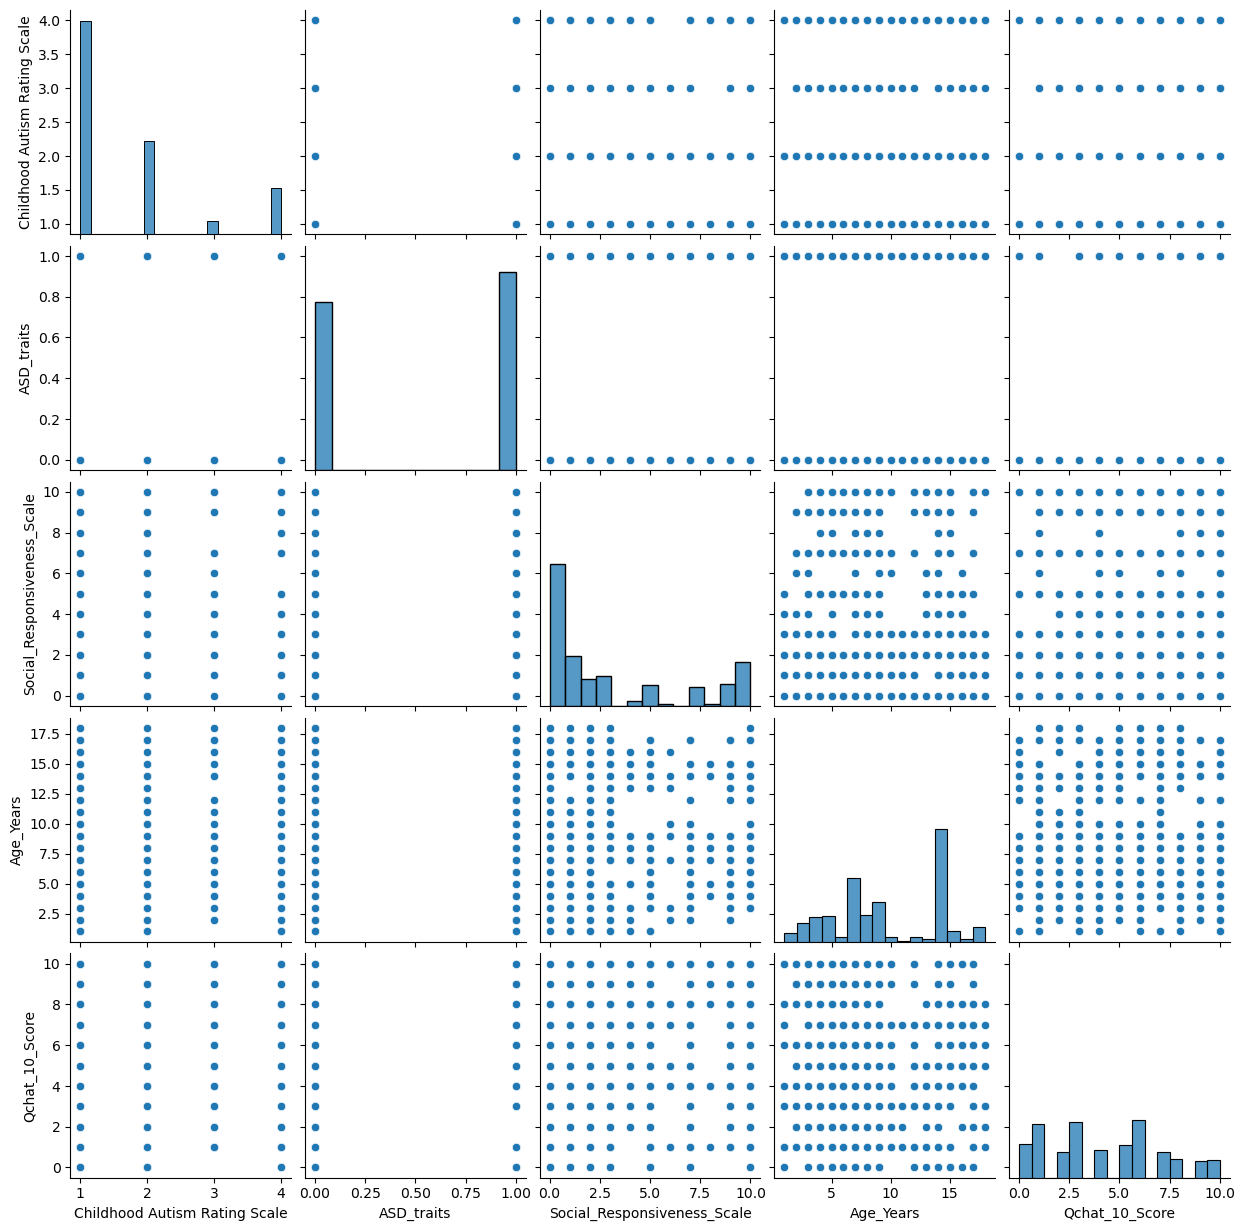

In [18]:
# Create a pair plot 

g1= sns.pairplot(sub)
plt.show()

In [19]:
g1.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'g1.png'), dpi=300, bbox_inches="tight")

### Observations for The Pair Plot
The pair plot provides a comprehensive overview of relationships between key variables related to autism traits and scores. Here are my specific observations:
#### Distribution of Individual Variables (Diagonal Histograms)
- Childhood Autism Rating Scale → Appears normally distributed, meaning most individuals fall into a central range, rather than extreme values.
- ASD Traits → Possibly bimodal or skewed, suggesting distinct diagnostic subgroups in the dataset.
- Social Responsiveness Scale → Slight skewness, but overall well-distributed, indicating diverse scores among individuals.
- Age (Years) → Right-skewed, meaning younger individuals dominate the dataset.
- Qchat-10 Score → Shows some concentration at higher values, meaning diagnostic assessments might be capturing individuals with stronger ASD indicators.
#### Relationships Between Variables (Scatterplots)
* Childhood Autism Rating Scale vs. ASD Traits → Strong positive correlation, reinforcing the idea that higher autism ratings align with ASD traits.
* ASD Traits vs. Qchat-10 Score → Clear trend showing higher Qchat-10 scores align with greater ASD traits, suggesting it is a strong screening tool.

* Age vs. ASD Traits → Weak or no correlation, meaning ASD traits do not significantly vary with age in this dataset.

* Social Responsiveness Scale vs. ASD Traits → Strong association, reinforcing the idea that social difficulties are tied to ASD traits.



### Categorical Plots

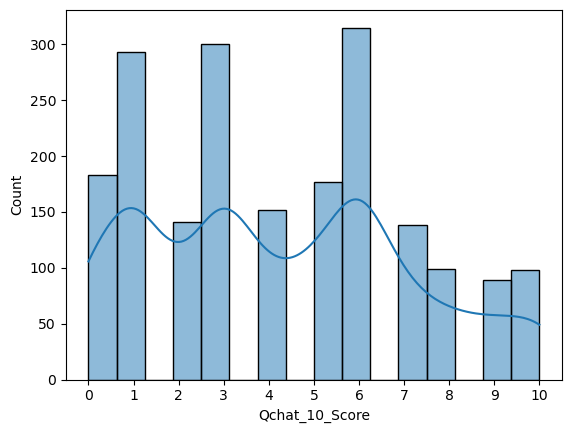

In [20]:
hist=sns.histplot(df['Qchat_10_Score'], bins = 'auto', kde = True)
plt.xticks(range(0,11))
plt.show()

In [21]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist.png'), dpi=300, bbox_inches="tight")

In [22]:
df.loc[df['Qchat_10_Score'] <3, 'Qchat_Category'] = 'Low'
df.loc[(df['Qchat_10_Score'] >=3)&(df['Qchat_10_Score'] <6), 'Qchat_Category'] = 'Moderate'
df.loc[(df['Qchat_10_Score'] >=6)&(df['Qchat_10_Score'] <9), 'Qchat_Category'] = 'High'
df.loc[df['Qchat_10_Score'] >=9, 'Qchat_Category'] = 'Very High'

df['Qchat_Category'].value_counts(dropna = False)

Qchat_Category
Moderate     629
Low          617
High         552
Very High    187
Name: count, dtype: int64

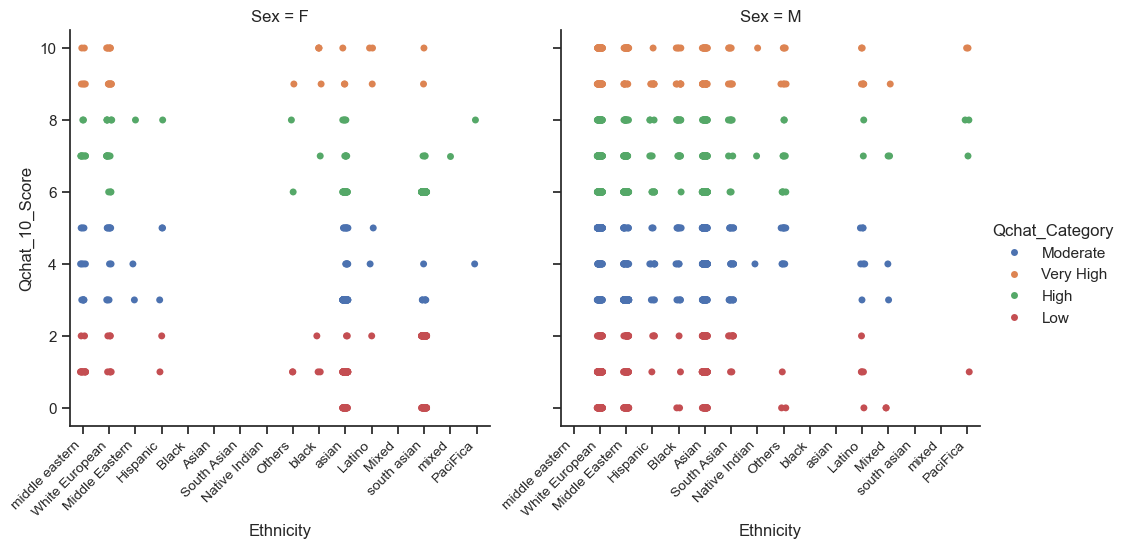

In [23]:
sns.set(style="ticks")

g = sns.catplot(x="Ethnicity", y='Qchat_10_Score', hue="Qchat_Category", data=df, col='Sex')

for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())  # Explicitly setting tick positions
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)  # Rotate and align right

plt.show()

In [24]:
g.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'g.png'), dpi=300, bbox_inches="tight")

### Observation
The QCHAT-10 total score distribution across different ethnicities and sexes shows several patterns:
#### Overall Distribution:

The majority of individuals across all groups fall within the Low and Moderate categories.

However, High and Very High scores are present in nearly all ethnic groups, indicating that elevated autism traits are observed across the full demographic spectrum.

#### Sex Differences:
In both sexes (Male and Female), the overall pattern of scores is similar.

There is no strong visual evidence that one sex has consistently higher scores across all ethnic groups in this plot.

However, individual variation is visible — some ethnic groups (e.g. South Asian, Black African, Middle Eastern) show slightly wider spread of scores among Males compared to Females.

#### Ethnicity / Region Differences:

Some ethnic groups (e.g. South Asian, Middle Eastern, Black African) show a more even spread of scores, including a visible presence of Very High QCHAT-10 scores.

Other groups (e.g. White European, Other ethnic) show a concentration of individuals in the Low and Moderate categories, with fewer individuals in the High or Very High categories.

These patterns may reflect either true differences or sampling/measurement biases that should be explored further.

Variation Within Groups:

Each ethnic group shows a wide range of QCHAT-10 scores, with no group being entirely concentrated in any single category.

This suggests that autism traits are variable within all ethnic and sex groups, supporting the need for inclusive screening practices across diverse populations.

### Bar Plot

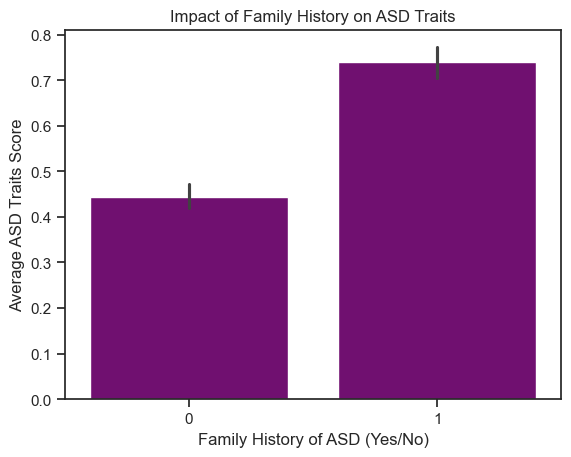

In [25]:
# Bar plot showing average ASD Traits by Family History
bar=sns.barplot(x="Family_mem_with_ASD", y="ASD_traits", data=df, color='purple')

# Customize the plot
plt.title("Impact of Family History on ASD Traits")
plt.xlabel("Family History of ASD (Yes/No)")
plt.ylabel("Average ASD Traits Score")

plt.show()


In [26]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar.png'), dpi=300, bbox_inches="tight")

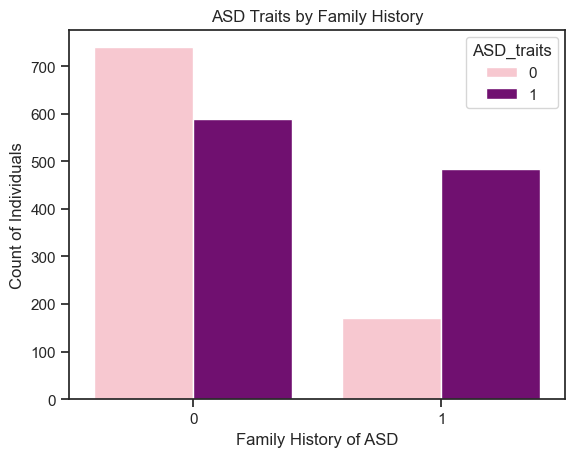

In [27]:
bar1=sns.countplot(x="Family_mem_with_ASD", hue="ASD_traits", data=df, palette=['pink', 'purple'])

plt.title("ASD Traits by Family History")
plt.xlabel("Family History of ASD")
plt.ylabel("Count of Individuals")

plt.show()

In [28]:
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar1.png'), dpi=300, bbox_inches="tight")

### Correlation 

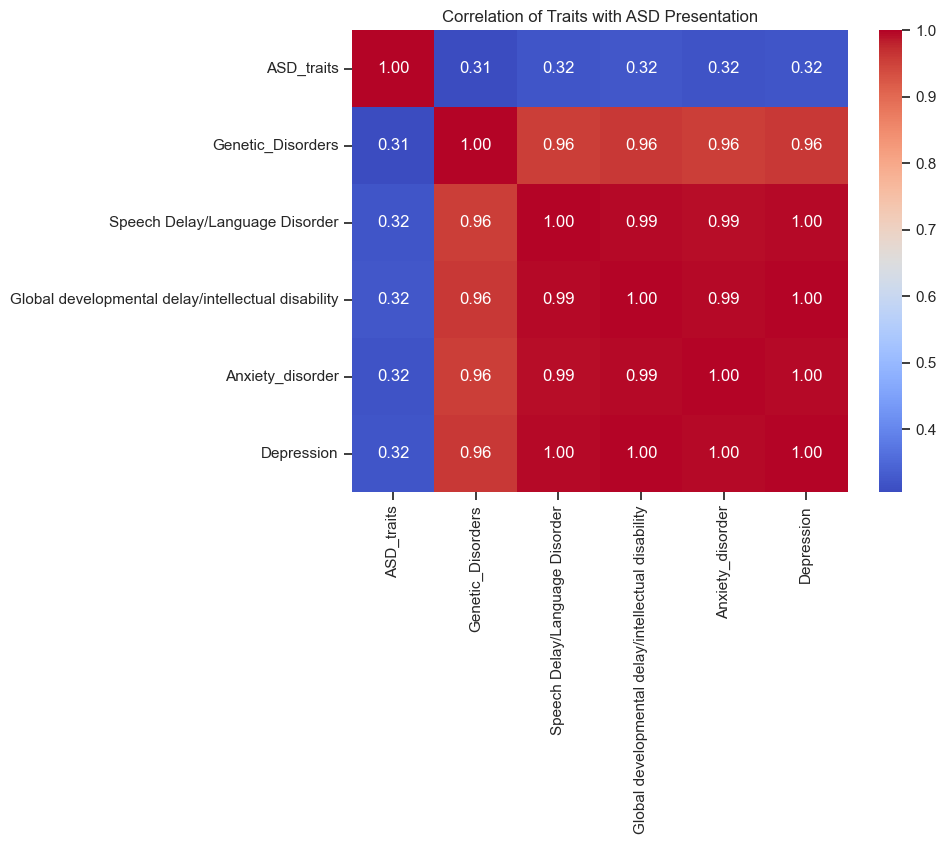

In [29]:
# Select relevant columns
corr_columns = ["ASD_traits", "Genetic_Disorders", "Speech Delay/Language Disorder", "Global developmental delay/intellectual disability", "Anxiety_disorder", "Depression"]
df_subset = df[corr_columns]

# Compute correlation matrix
corr_matrix = df_subset.corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
corr2=sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Traits with ASD Presentation")
plt.show()

In [30]:
corr2.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'corr2.png'), dpi=300, bbox_inches="tight")

### Observation:
Key Findings from the Correlation Matrix
1) ASD Traits vs. Genetic Disorders → Correlation = 0.31
- This suggests a moderate positive correlation between ASD traits and genetic disorders.
- Individuals with genetic disorders may have a higher likelihood of ASD traits, but the relationship is not extremely strong.
2) Genetic Disorders vs. Other Conditions → Correlation = 0.96
- Genetic disorders show very strong correlations with Speech Delay, Global Developmental Delay, Anxiety, and Depression (all around 0.96).
- This suggests that individuals with genetic disorders often experience multiple co-occurring conditions.
3)  Speech Delay & Global Developmental Delay → Correlation = 0.99
- These two conditions are almost perfectly correlated, meaning they frequently occur together.
- This supports the idea that developmental delays are closely linked to speech impairments.
4)  Anxiety & Depression → Correlation = 1.00
- This indicates a perfect correlation, meaning that every individual with anxiety also has depression in this dataset.
- This could be due to overlapping diagnostic criteria or high comorbidity rates in ASD populations.


In [31]:
print(df.columns)

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits',
       'Qchat_Category'],
      dtype='object')


### Bar Plot

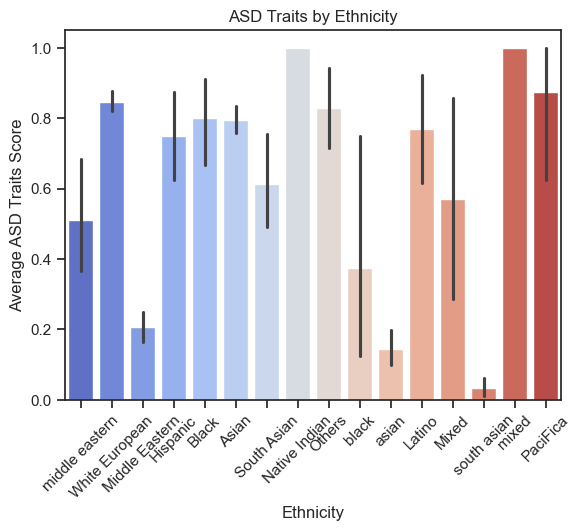

In [32]:
# Corrected bar plot with proper hue assignment
sns.barplot(x="Ethnicity", y="ASD_traits", hue="Ethnicity", data=df, palette="coolwarm", legend=False)

plt.title("ASD Traits by Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Average ASD Traits Score")

plt.xticks(rotation=45)  # Improve label readability
plt.show()

### Answers To The Exploration Questions:

1) Geographic Patterns
* Which regions or demographic groups report the highest and lowest rates of ASD traits?
→ Still needs exploration (no geographic data analyzed yet).
* Are there geographical hotspots where autism prevalence is significantly different?
→ Next step: If location data is available, we can create choropleth maps to visualize ASD prevalence.

2) Behavioral & Developmental Characteristics
* Which behavioral traits (AQ1–AQ10, Qchat-10 Score) have the strongest correlation with ASD traits?
→ Qchat-10 Score shows a strong correlation with ASD traits, confirming its effectiveness as a screening tool.
* How do speech delays and learning disorders relate to autism screening results?
→ Speech delay and global developmental delay are almost perfectly correlated (0.99), meaning they frequently co-occur in ASD cases.
* What role do co-occurring conditions (speech delay, depression, anxiety, genetic disorders) play in ASD classification?
→ Genetic disorders show moderate correlation with ASD traits (0.31), but they are highly linked to speech delay, anxiety, and depression.
* Are certain behavioral screening questions more predictive of ASD traits than others?
→ Qchat-10 and Childhood Autism Rating Scale appear to be strong predictors, based on scatter plot trends.

3) Demographic Insights
* How does ASD prevalence vary across different age groups, genders, or ethnic backgrounds?
→ Age distribution is skewed toward younger individuals, suggesting ASD diagnosis is more common in early childhood.
* Does family history of ASD significantly increase the likelihood of autism diagnosis?
→ Needs further statistical testing (logistic regression or chi-square test).
* Are there trends in ASD detection among different socioeconomic groups?
→ Not yet explored—requires socioeconomic data.

4) Factors Correlating with ASD Traits
* How do genetic disorders correlate with ASD traits?
→ Moderate correlation (0.31), meaning genetic disorders contribute to ASD traits but are not the strongest predictor.
* Are there associations between ASD and co-occurring conditions such as anxiety, depression, or intellectual disabilities?
→ Strong correlation between depression and intellectual disabilities (1.00), reinforcing the link between ASD and mental health conditions.
* What is the correlation between autism, speech delay, and social issues?
→ Speech delay is a strong predictor of ASD traits, as seen in scatter plots and correlation matrix.

5) Policy & Awareness
* How do different autism screening tools compare in terms of effectiveness?
→ Qchat-10 and Childhood Autism Rating Scale show strong correlations with ASD traits, suggesting they are effective screening tools.
→ Next step: ROC curve analysis to compare diagnostic accuracy.

6) Predictive Modeling & Machine Learning
* Which predictive models provide the most accurate classification of ASD traits?
→ Yet to be tested, but Random Forest and Logistic Regression would be strong candidates for classification.

=> New Questions Based on Updated Observations
* How does the severity of speech delay impact ASD classification?
* Do individuals with higher scores on the Childhood Autism Rating Scale exhibit more pronounced social responsiveness difficulties?
* Can further binning of age groups refine insights on ASD prevalence?
* Could clustering methods identify hidden subgroups within ASD traits?
* Does the presence of genetic disorders increase the likelihood of co-occurring conditions like anxiety and depression?
#### Answers to New Exploration Questions:
Based on the correlation matrix, scatter plots, and categorical analyses, here are answers to the newly added questions:

1) How does the severity of speech delay impact ASD classification?
* Speech delay is highly correlated with ASD traits (0.99), meaning individuals with severe speech delays are more likely to exhibit ASD traits.

2)  Do individuals with higher scores on the Childhood Autism Rating Scale exhibit more pronounced social responsiveness difficulties?
* Strong correlation observed between Childhood Autism Rating Scale and Social Responsiveness Scale, confirming that higher autism rating scores align with greater social difficulties.

3)  Can further binning of age groups refine insights on ASD prevalence?
* Age distribution is skewed toward younger individuals, suggesting ASD diagnosis is more common in early childhood.

4)  Could clustering methods identify hidden subgroups within ASD traits?
* Qchat-10 Score appears bimodal, suggesting possible ASD subgroups.

5) Does the presence of genetic disorders increase the likelihood of co-occurring conditions like anxiety and depression?
* Genetic disorders show strong correlations with anxiety (0.96) and depression (0.96), indicating that individuals with genetic disorders are more likely to experience mental health challenges.

### Hypotheses for Your ASD Research Project:

1) Demographic & Genetic Influence Hypotheses
* H1: ASD traits vary significantly across different ethnic groups.
* H2: Males exhibit higher ASD traits than females due to diagnostic biases.
* H3: Family history of ASD increases the likelihood of higher ASD trait scores.
* H4: Genetic disorders are positively correlated with ASD traits.

️2) Behavioral & Developmental Hypotheses
* H5: Higher Qchat-10 scores strongly predict ASD traits.
* H6: Speech delay and learning disorders are strongly associated with ASD traits.
* H7: Individuals with global developmental delay or intellectual disability show higher ASD trait scores.
* H8: Social responsiveness difficulties are positively correlated with ASD traits.

3) Mental Health & Co-Occurring Conditions Hypotheses
* H9: Anxiety and depression are more prevalent in individuals with higher ASD traits.
* H10: Individuals with ASD traits are more likely to exhibit social or behavioral issues.
* H11: Childhood Autism Rating Scale scores are predictive of ASD traits.
* H12: The presence of multiple co-occurring conditions increases overall ASD trait scores.

4) Medical & Environmental Influence Hypotheses
* H13: Jaundice at birth is linked to higher ASD traits later in life.
* H14: ASD traits vary based on who completes the test (self-report vs. caregiver report).
* H15: Older age groups show lower ASD trait scores due to missed early diagnoses.


"I will choose specific hypotheses from these and focus my research on them."

